# Wine Classification with K-Nearest-Neighbor Algorithm

### Wines will be classified as one of three grape varieties based on a matrix of 13 features

## Import Libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine



## Import Dataset

In [2]:
data = load_wine()

wine_data = pd.DataFrame(data.data, columns=data.feature_names)

wine_data['cultivar_class'] = data.target

wine_data.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cultivar_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


## Split the Dataset into x and y

In [3]:
x = wine_data.iloc[:,:-1].values
y = wine_data.iloc[:,-1].values

## Split Data into Training and Test Sets

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)


## Feature Scale the Matrix of Features

In [5]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Instantiate and Train the Model 

In [6]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

## Compare Predictions and True Values 

In [7]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [0 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [1 1]]


## Create a Confusion Matrix 

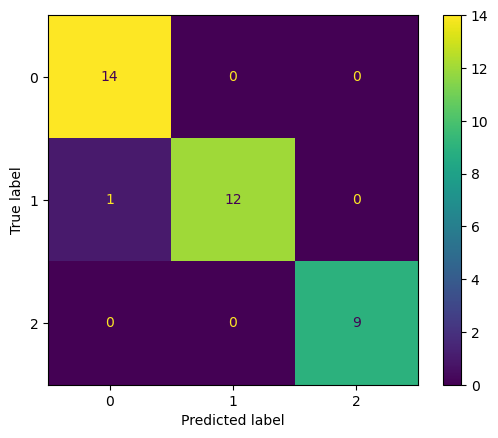

In [8]:
cm = confusion_matrix(y_test, y_pred) #always put test data (y_true) first and predicted values second at instantiation

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

AS = accuracy_score(y_test,y_pred)

disp.plot()

## Print Accuracy Score

In [9]:
print(f"Accuracy Score for this Model: {round(AS,3)}")

Accuracy Score for this Model: 0.972


## Graph F1 Scores for Each Class

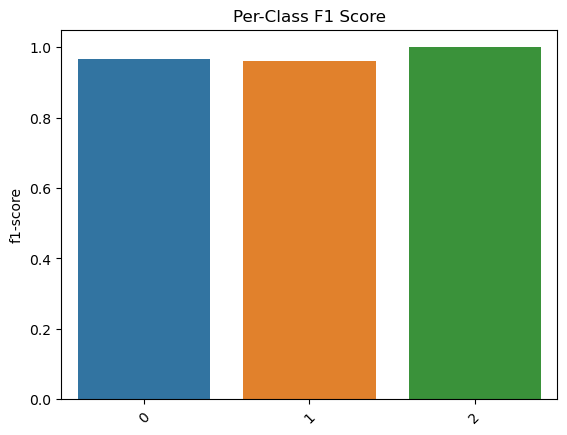

In [10]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
sns.barplot(x=df.index[:-3], y=df['f1-score'][:-3])
plt.title("Per-Class F1 Score")
plt.xticks(rotation=45)
plt.show()